In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df = yf.download('RELIANCE.NS')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,15.944529,15.754989,15.917452,10.543346,48051995
1996-01-02,15.878770,15.956133,15.677626,15.793671,10.461358,77875009
1996-01-03,16.052837,16.783918,15.878770,15.913584,10.540785,96602936
1996-01-04,15.762726,15.813012,15.553845,15.766594,10.443419,100099436
1996-01-05,15.704703,15.704703,15.522900,15.658285,10.371678,76935930


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-11,1915.000000,1938.550049,1910.000000,1933.150024,1933.150024,6220217
2021-05-12,1930.099976,1932.900024,1907.000000,1913.150024,1913.150024,6081627
2021-05-14,1928.050049,1942.000000,1906.000000,1937.300049,1937.300049,6134079
2021-05-17,1937.300049,1963.449951,1930.400024,1960.349976,1960.349976,5479424
2021-05-18,1981.000000,2002.599976,1972.500000,1987.949951,1987.949951,5566402


In [5]:
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [6]:
df.shape

(6378, 6)

## His

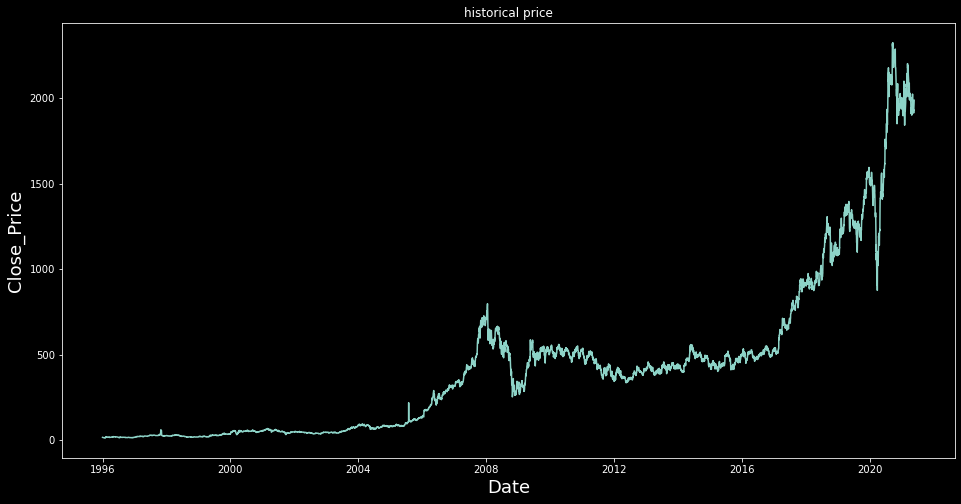

In [7]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [8]:
df = df['Close']

## Scaled Data

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))

training_size=int(len(scaled_df)*0.8)
test_size=len(scaled_df)-training_size
train_data =scaled_df[0:training_size,:]
test_data = scaled_df[training_size:len(scaled_df),:1]
training_size,test_size

## Train-Test_Split

In [12]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5103

In [16]:
train_data = scaled_df[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00174118, 0.00168765, 0.0017395 , 0.00167594, 0.00162911,
       0.00135815, 0.00117082, 0.00100858, 0.00120093, 0.00113402,
       0.00106879, 0.0010805 , 0.00083295, 0.00066737, 0.00056534,
       0.00066235, 0.00041648, 0.0002258 , 0.        , 0.        ,
       0.00040477, 0.0009032 , 0.00077107, 0.00100858, 0.00167594,
       0.00224296, 0.00162409, 0.00174954, 0.00235168, 0.00278655,
       0.00228979, 0.00273637, 0.00274139, 0.00261595, 0.00247879,
       0.00255573, 0.00214929, 0.00214929, 0.00253399, 0.00245203,
       0.00246876, 0.00238178, 0.00241858, 0.00194523, 0.00198538,
       0.00191178, 0.00191178, 0.00216267, 0.0022279 , 0.00218943,
       0.00221285, 0.00259086, 0.00245872, 0.00245705, 0.00220783,
       0.00187331, 0.00144178, 0.00144178, 0.00191345, 0.00162744])]
[0.0015872970937636458]



In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [23]:
x_train.shape

(5043, 60, 1)

## Build LSTM

In [25]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))